In [1]:
import pandas as pd
import math
import numpy as np
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


ModuleNotFoundError: No module named 'pandas_datareader'

In [2]:
pip install pandas_datareader

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.5/109.5 kB 469.6 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 1.0 MB/s eta 0:00:0000:0100:010m
  Preparing metadata (setup.py) ... done
  Created wheel for lxml: filename=lxml-4.9.2-cp311-cp311-macosx_10_9_universal2.whl size=3129820 sha256=f19ae575923e900d923913ed1204c3e41a156d9a7f4bf1718bcf3b85c612adb4
  Stored in directory: /Users/vidyasagar/Library/Caches/pip/wheels/f9/41/12/f39a1bff9a8fd1b189415346d2ab3c7f408669902d76663b83
Successfully built lxml

[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install Tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.3/189.3 MB 1.7 MB/s eta 0:00:0000:0100:03
  Using cached absl_py-1.4.0-py3-none-any.whl (126 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached flatbuffers-23.5.26-py2.py3-none-any.whl (26 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 2.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.3/24.3 MB 1.9 MB/s eta 0:00:0000:0100:01m
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached protobuf-4.23.3-cp37-abi3-macosx_10_9_universal2.whl (400 kB)
  Using cached termcolor-2.3.0-py3-none-any.whl (6.9 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 1.1 MB/s eta 0:00:0000:0100:010m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 1.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 661.7 kB/s e

In [ ]:
#get the stock quote
df = web.get_data_tiingo('AAPL',api_key='83f7a2ef62eb70082dfc0da0c89d02802c02af7c')


<ipython-input-85-62df2cef3dc9>:2: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df = web.get_data_tiingo('AAPL',api_key='83f7a2ef62eb70082dfc0da0c89d02802c02af7c')


In [ ]:
df.to_csv('AAPL.csv',index=False)

In [ ]:
df=pd.read_csv('AAPL.csv')

In [ ]:
df2=df.reset_index()['close']

In [ ]:
df2

0       187.18
1       183.92
2       185.40
3       187.97
4       190.58
         ...  
1252    186.68
1253    185.27
1254    188.06
1255    189.25
1256    189.59
Name: close, Length: 1257, dtype: float64

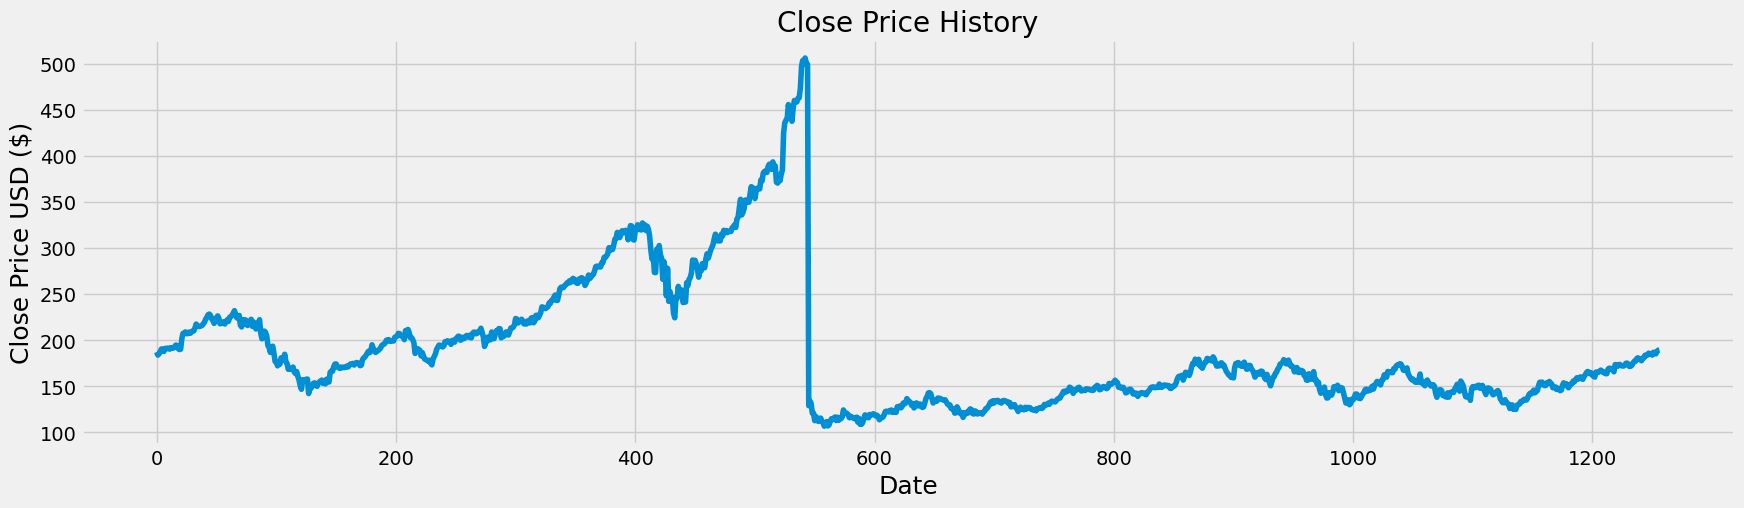

In [ ]:
#visualixe the closing price history
plt.figure(figsize=(19,5))
plt.title('Close Price History')
plt.plot(df2)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.show()

In [ ]:
data=df.filter(['close'])
dataset=data.values
training_data_len=math.ceil(len(dataset)*.8)
training_data_len

1006

In [ ]:
#scale the data

scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)

scaled_data


array([[0.2012273 ],
       [0.19306199],
       [0.19676894],
       ...,
       [0.20343143],
       [0.20641202],
       [0.20726362]])

In [ ]:
#create training data

train_data=scaled_data[0:training_data_len,:]
x_train=[]
y_train=[]

for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=60:
    print(x_train)
    print(y_train)
    print()

[array([0.2012273 , 0.19306199, 0.19676894, 0.20320601, 0.20974327,
       0.20916719, 0.20298059, 0.21087038, 0.21162179, 0.21056982,
       0.21192235, 0.20929242, 0.21299937, 0.21189731, 0.21232311,
       0.21580463, 0.22036318, 0.21883532, 0.21074515, 0.20806512,
       0.20901691, 0.23709455, 0.25184721, 0.25335003, 0.2560551 ,
       0.2511459 , 0.25149656, 0.25557921, 0.25219787, 0.25555416,
       0.2577583 , 0.2589856 , 0.26670006, 0.27737007, 0.27206011,
       0.27100814, 0.27103319, 0.27213525, 0.2738134 , 0.27827176,
       0.28268003, 0.29089543, 0.29603006, 0.30254227, 0.3043707 ,
       0.3006387 , 0.29119599, 0.28668754, 0.27924859, 0.29307451,
       0.28611146, 0.29948654, 0.29304947, 0.27812148, 0.27902317,
       0.27934878, 0.28350657, 0.27757044, 0.28541014, 0.28891672])]
[0.2844834063869755]



In [ ]:
#converting x_train and y_train to numpy arrays
x_train,y_train=np.array(x_train),np.array(y_train)

In [ ]:
#reshape the data

x_train=np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_train.shape

(946, 60, 1)

In [ ]:
#Build the LSTM model
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mean_squared_error')

In [ ]:
#model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 60, 50)            10400     
                                                                 
 lstm_7 (LSTM)               (None, 60, 50)            20200     
                                                                 
 lstm_8 (LSTM)               (None, 50)                20200     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Train the model
model.fit(x_train,y_train,batch_size=64,epochs=100)

Epoch 1/100
15/15 [==============================] - 5s 64ms/step - loss: 0.0349
Epoch 2/100
15/15 [==============================] - 1s 63ms/step - loss: 0.0107
Epoch 3/100
15/15 [==============================] - 1s 92ms/step - loss: 0.0073
Epoch 4/100
15/15 [==============================] - 2s 107ms/step - loss: 0.0062
Epoch 5/100
15/15 [==============================] - 2s 141ms/step - loss: 0.0054
Epoch 6/100
15/15 [==============================] - 1s 62ms/step - loss: 0.0048
Epoch 7/100
15/15 [==============================] - 1s 65ms/step - loss: 0.0048
Epoch 8/100
15/15 [==============================] - 1s 63ms/step - loss: 0.0036
Epoch 9/100
15/15 [==============================] - 1s 62ms/step - loss: 0.0032
Epoch 10/100
15/15 [==============================] - 1s 64ms/step - loss: 0.0030
Epoch 11/100
15/15 [==============================] - 1s 64ms/step - loss: 0.0035
Epoch 12/100
15/15 [==============================] - 1s 66ms/step - loss: 0.0034
Epoch 13/100
15/15 [===

In [ ]:
#create test dataset
test_data=scaled_data[training_data_len-60: , :]
x_test=[]
y_test=dataset[training_data_len:, :]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])




In [ ]:
x_test=np.array(x_test)

In [ ]:
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1], 1))

In [ ]:
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)

8/8 [==============================] - 0s 16ms/step


In [ ]:
MSE = np.square(np.subtract(y_test,predictions)).mean()

RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

4.402897878276457


In [ ]:
from sklearn.metrics import r2_score
R_square = r2_score(y_test,predictions)
print('Coefficient of Determination', R_square)

Coefficient of Determination 0.9083354025753088


<ipython-input-110-2eb856a66a71>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']=predictions


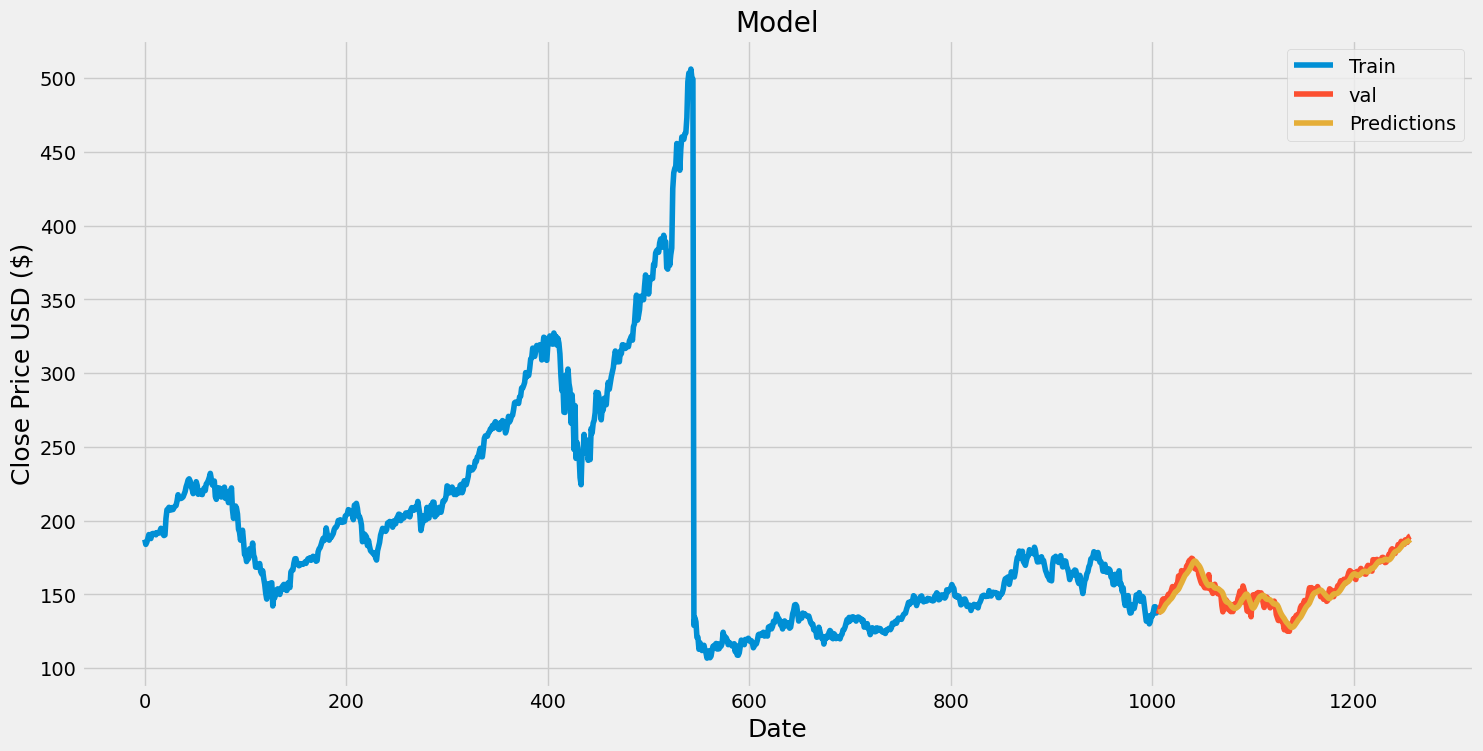

In [ ]:
#plot the data
train=data[:training_data_len]
valid=data[training_data_len:]
valid['Predictions']=predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.plot(train['close'])
plt.plot(valid[['close','Predictions']])
plt.legend(['Train','val','Predictions'],loc='upper right')
plt.show()

In [ ]:
valid

,close,Predictions
1006,136.72,137.905777
1007,138.93,138.149170
1008,141.56,138.262085
1009,142.92,138.573761
1010,146.35,139.172333
...,...,...
1252,186.68,185.423309
1253,185.27,185.898666
1254,188.06,186.173798
1255,189.25,186.592972
